# ⭕ 학습 로드맵 (Remind)

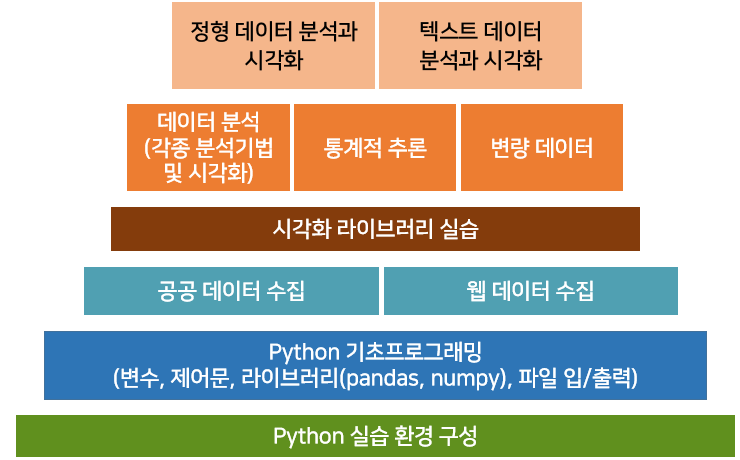

# 웹 페이지 구성 실습

📑 HTML (HyperText Markup Language)
  - 웹 브라우저에 표시되도록 설계된 문서의 표준 마크업 언어
  - 파일의 일반 확장자 : html, htm

📑 CSS (Cascading Style Sheets)
  - 마크업 언어가 실제 표시되는 방법을 기술하는 스타일 언어
  - 파일의 일반 확장자 : css

📑 Javascript
  - 동적기능과 연결을 담당하는 언어
  - 파일의 일반 확장자 : js



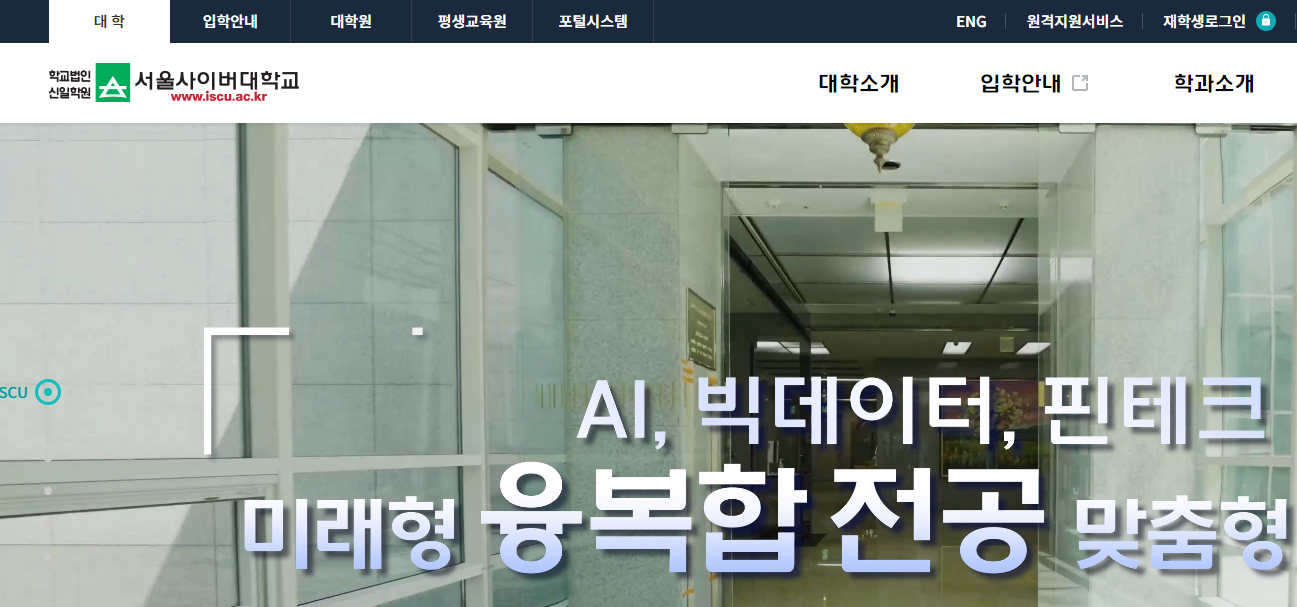

# 사전 지식

## 웹 서버 접속과 수신데이터

In [ ]:
# 웹서버에 접속하여 필요 정보를 요청한 후
# 수신된 html 내용에서 관심있는 정보를 추출
import requests
from bs4 import BeautifulSoup

res = requests.get('http://v.media.daum.net/v/20170615203441266')

In [ ]:
# 서버 접속결과 코드 (200 - 정상, 그외 HTTP 통신결과 코드에 정의)
res.status_code

200

In [ ]:
# 수신 데이터 Header 정보
res.headers

{'Date': 'Sat, 18 Feb 2023 09:14:44 GMT', 'Content-Type': 'text/html;charset=UTF-8', 'Content-Length': '23043', 'Connection': 'keep-alive', 'content-encoding': 'gzip', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains'}

In [ ]:
# 수신 데이터 Body 정보 (일반적으로 HTML)
res.content

## 데이터 추출(정규식 vs BeautifulSoup)

In [ ]:
# html 내용에서 관심있는 정보를 정규식을 이용하여 추출 (난이도 높음)
import requests
import re
 
url ="http://finance.naver.com/item/main.nhn?code=005930"
html = requests.get(url)
html_contents = str(html.content.decode("euc-kr"))
 
stock_results = re.findall("(\<dl class=\"blind\"\>)([\s\S]+?)(\<\/dl\>)", html_contents)
samsung_stock = stock_results[0]
samsung_index = samsung_stock[1]
 
# 주식 정보만 추출함
index_list= re.findall("(\<dd\>)([\s\S]+?)(\<\/dd\>)", samsung_index)
for index in index_list:
    print(index[1])

2023년 02월 13일 09시 20분 기준 장중
종목명 삼성전자
종목코드 005930 코스피
현재가 62,600 전일대비 하락 200 마이너스 0.32 퍼센트
전일가 62,800
시가 62,900
고가 63,000
상한가 81,600
저가 62,500
하한가 44,000
거래량 2,208,406
거래대금 138,560백만


In [ ]:
# html 내용에서 관심있는 정보를 BeautifulSoup패키지를 이용하여 추출 (난이도 낮음)
import requests
from bs4 import BeautifulSoup

url ="http://finance.naver.com/item/main.nhn?code=005930"
html = requests.get(url)

soup = BeautifulSoup(html.content, 'html.parser')
data = soup.find_all('dl', class_='blind')
data = data[0].text
print(data)


종목 시세 정보
2023년 02월 20일 16시 10분 기준 장마감
종목명 삼성전자
종목코드 005930 코스피
현재가 62,700 전일대비 상승 100 플러스 0.16 퍼센트
전일가 62,600
시가 62,900
고가 63,000
상한가 81,300
저가 61,800
하한가 43,900
거래량 12,882,732
거래대금 804,609백만



## 데이터 추출(find() vs select())

### find() - 예제 #1

In [ ]:
# Tag를 이용한 데이터 접근 - 단순 Tag
# html 내용에서 관심있는 정보를 BeautifulSoup패키지를 이용하여 추출
import requests
from bs4 import BeautifulSoup

res = requests.get('http://v.media.daum.net/v/20170615203441266')

soup = BeautifulSoup(res.content, 'html.parser')

title_tag = soup.find('title') # <title> Tag를 검색

In [ ]:
# Tag 원문
print('title_tag : ', title_tag)

# Tag 이름
print('title_tag.name : ', title_tag.name)

# Tag 텍스트(정보)
print('title_tag.text : ', title_tag.text)

# Tag 속성과 속성 값
print('title_tag.attrs : ', title_tag.attrs)

title_tag :  <title>잔금대출에도 DTI 규제 적용 검토</title>
title_tag.name :  title
title_tag.text :  잔금대출에도 DTI 규제 적용 검토
title_tag.attrs :  {}


### find() - 예제 #2

In [ ]:
# Tag를 이용한 데이터 접근 - 복잡 Tag
# html 내용에서 관심있는 정보를 BeautifulSoup패키지를 이용하여 추출
from bs4 import BeautifulSoup

ex_content = '<a href="https://www.daum.net/" class="link_logo" data-tiara-layer="footer links logo">메인페이지</a>'
soup = BeautifulSoup(ex_content, 'html.parser')

a_tag = soup.find('a')

# Tag 원문
print('a_tag : ', a_tag)

# Tag 이름
print('a_tag.name : ', a_tag.name)

# Tag 텍스트(정보)
print('a_tag.text : ', a_tag.text)

# Tag 속성과 속성 값
print('a_tag.attrs : ', a_tag.attrs)

a_tag :  <a class="link_logo" data-tiara-layer="footer links logo" href="https://www.daum.net/">메인페이지</a>
a_tag.name :  a
a_tag.text :  메인페이지
a_tag.attrs :  {'href': 'https://www.daum.net/', 'class': ['link_logo'], 'data-tiara-layer': 'footer links logo'}


### find() - 예제 #3

In [ ]:
# Tag와 CSS를 혼용하여 데이터 접근 - 복잡 Tag
# html 내용에서 관심있는 정보를 BeautifulSoup패키지를 이용하여 추출
from bs4 import BeautifulSoup

ex_content = '''
    <a href="https://www.daum.net/" class="link_daum" data-tiara-layer="footer links logo">다음 메인페이지</a>
    <a href="https://www.naver.com/" class="link_naver"><label class="t_hap">네이버 메인페이지</label></div>
'''
soup = BeautifulSoup(ex_content, 'html.parser')

a_tag = soup.find('a', class_='link_naver')

# Tag 원문
print('a_tag : ', a_tag)

# Tag 이름
print('a_tag.name : ', a_tag.name)

# Tag 텍스트(정보)
print('a_tag.text : ', a_tag.text)

# Tag 속성과 속성 값
print('a_tag.attrs : ', a_tag.attrs)

a_tag :  <a class="link_naver" href="https://www.naver.com/"><label class="t_hap">네이버 메인페이지</label></a>
a_tag.name :  a
a_tag.text :  네이버 메인페이지
a_tag.attrs :  {'href': 'https://www.naver.com/', 'class': ['link_naver']}


### select() - 예제 #1

In [ ]:
# CSS를 이용한 데이터 접근
# html 내용에서 관심있는 정보를 BeautifulSoup패키지를 이용하여 추출
import requests
from bs4 import BeautifulSoup

res = requests.get('http://v.media.daum.net/v/20170615203441266')

soup = BeautifulSoup(res.content, 'html.parser')

title_tag = soup.select('.tit_view')

In [ ]:
# CSS를 포함하는 Tag 원문
print('title_tag : ', title_tag)

# CSS를 포함하는 Tag 이름
print('title_tag.name : ', title_tag[0].name)

# CSS를 포함하는 Tag 텍스트(정보)
print('title_tag.text : ', title_tag[0].text)

# CSS를 포함하는 Tag 속성과 속성 값
print('title_tag.attrs : ', title_tag[0].attrs)

title_tag :  [<h3 class="tit_view" data-translation="true">잔금대출에도 DTI 규제 적용 검토</h3>]
title_tag.name :  h3
title_tag.text :  잔금대출에도 DTI 규제 적용 검토
title_tag.attrs :  {'class': ['tit_view'], 'data-translation': 'true'}


### select() - 예제 #2

In [ ]:
# CSS를 포함하는 Tag 내용이 복잡한 경우
# html 내용에서 관심있는 정보를 BeautifulSoup패키지를 이용하여 추출
from bs4 import BeautifulSoup

ex_content = '<a href="https://www.daum.net/" class="link_logo" data-tiara-layer="footer links logo">메인페이지</a>'
soup = BeautifulSoup(ex_content, 'html.parser')

a_tag = soup.select('.link_logo')

# Tag 원문
print('a_tag : ', a_tag)

# Tag 이름
print('a_tag.name : ', a_tag[0].name)

# Tag 텍스트(정보)
print('a_tag.text : ', a_tag[0].text)

# Tag 속성과 속성 값
print('a_tag.attrs : ', a_tag[0].attrs)

a_tag :  [<a class="link_logo" data-tiara-layer="footer links logo" href="https://www.daum.net/">메인페이지</a>]
a_tag.name :  a
a_tag.text :  메인페이지
a_tag.attrs :  {'href': 'https://www.daum.net/', 'class': ['link_logo'], 'data-tiara-layer': 'footer links logo'}


## Colab에서 이미지 보기

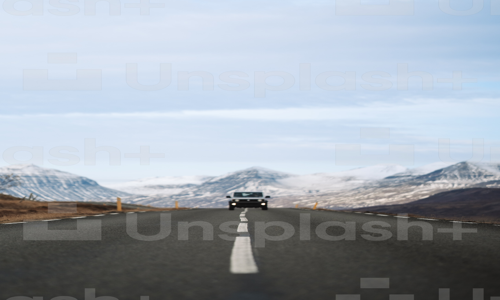

In [ ]:
# 이미지 스크래핑 후 결과 확인하기 위한 선행 지식
from PIL import Image

img = Image.open('image.jpg')
img.resize((500, 300))

## BeautifulSoup 파서 종류

In [ ]:
# HTML 일반 Parser (열린 Tag를 중심으로 문장 오류 수정)
from bs4 import BeautifulSoup

# html.parser
BeautifulSoup('<b><a>test</a></k>', 'html.parser')

<b><a>test</a></b>

In [ ]:
# 확장 HTML Parser (열린 Tag를 중심으로 문장 오류 수정 + html, body Tag 추가)
from bs4 import BeautifulSoup

# html.parser
BeautifulSoup('<b><a>test</a></k>', 'lxml')

<html><body><b><a>test</a></b></body></html>

In [ ]:
# 완전문장화 HTML Parser (열린 Tag를 중심으로 문장 오류 수정 + html, head, body Tag 추가 + Tag 수정)
from bs4 import BeautifulSoup

# html.parser
BeautifulSoup('<b><a>test</a></p>', 'html5lib')

<html><head></head><body><b><a>test</a><p></p></b></body></html>

In [ ]:
# XML Parser
from bs4 import BeautifulSoup

# html.parser
BeautifulSoup('<b><a>test</a></p>', 'xml')

<?xml version="1.0" encoding="utf-8"?>
<b><a>test</a></b>

# 웹 스크래핑 실습 🔶 이미지

## ▶ 스크래핑 준비

- 접속 사이트 : https://search.naver.com/search.naver?where=image&sm=tab_jum&query=

- 수집 대상 : 자동차 이미지 (car image)

- 수집건수 : 100건 (또는 가능한 많이)

- 저장 폴더 : /contents/images

## ▶ 스크래핑 코드(prototype)

### 결과 데이터가 html 인 경우

- 접속 사이트 : https://www.google.com/search?q=car&sxsrf=ALeKk03xBalIZi7BAzyIRw8R4_KrIEYONg:1620885765119&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjv44CC_sXwAhUZyjgGHSgdAQ8Q_AUoAXoECAEQAw&cshid=1620885828054361

In [ ]:
import requests
from bs4 import BeautifulSoup

car_search_url = 'https://www.google.com/search?q=car&sxsrf=ALeKk03xBalIZi7BAzyIRw8R4_KrIEYONg:1620885765119&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjv44CC_sXwAhUZyjgGHSgdAQ8Q_AUoAXoECAEQAw&cshid=1620885828054361'
car_page = requests.get(car_search_url)
soup = BeautifulSoup(car_page.content, "html.parser")
# print(soup.prettify())

image_tags = soup.find_all('img', class_='yWs4tf')

image_links = []
for image_tag in image_tags:
  image_links.append(image_tag['src'])

image_links  

['https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTWjmoLFs-4gvWfh8qpyR76rEtIK7He_6_PxHzC0sMl0xSvb55td-kx9Y0JsA&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQKh2J-QuW6qHwsR1IaQGboVw7LoNqsxhh7K9LpeW13pmDpo_ueWdgsp-I_Ow&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQicT4zApv6l6zrfXWsaL4IHvsq6YV2Nc1L8ogo9rzlkzAhJsHqwTB0Q6tfSzw&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSZdl8oQEmAyMMrI9qwGjOIMN4fWNDzAO2aftqBXyInZ91kQEzfBbXy6Iw6pw&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQKPp-QwD1BQHilf-5K61gjtjoHEhQMLmIGwa82_xRVvZvj6nqWf1IRG-iv8A&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRKfjNFZ83XxbZA3OKBjroZk9oPTL0wYh7W9lhtsBuuX2YCHMtaJwpk-97-sA&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQUH_N3jSMbTx_5GSPFSZEn3bUQbEkbcK7QUywMjq6DD_jGswsbaJdRcxTXLV8&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRTYL3qPAoV8s7bzYDp8-z2R2nb57FA69zSHHhLwHsHY9Nob-4BdKVM2-tAopw&s',
 'https://encrypted-tbn0.gsta

In [ ]:
result = requests.get(image_links[0])
with open('image_new.jpg', 'wb') as f:
  f.write(result.content)

In [ ]:
import glob

glob.glob('./**')

['./image_new.jpg', './sample_data']

### 결과 데이터가 javascript 인 경우

In [ ]:
import requests
import pandas as pd
import json
from bs4 import BeautifulSoup

In [ ]:
key_word = 'car'
naver_images_page = "https://search.daum.net/search?w=img&nil_search=btn&DA=NTB&enc=utf8&q=" + key_word
result = requests.get(naver_images_page)
if result.status_code == 200:
    soup = BeautifulSoup(result.content, "html.parser")

In [ ]:
soup.contents

In [ ]:
image_list = soup.find_all('script')
image_list
image_list = str(image_list).split('url: "https://search')[:-1]

for x in image_list:
  if x.find('kakaocdn.net/argon') > 0:
    x = '"https://search' + x
    image_url = x.split(', w:')[0].replace('"', '')


In [ ]:
result = requests.get(image_url)
with open('image_js.jpg', 'wb') as f:
  f.write(result.content)

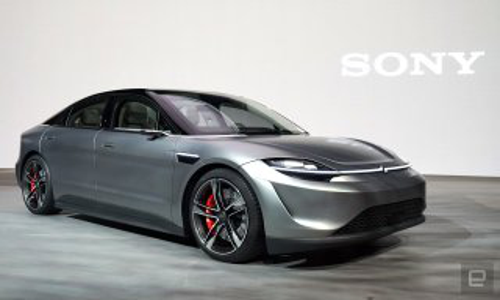

In [ ]:
from PIL import Image

img = Image.open('image_js.jpg')
img.resize((500, 300))

### 결과 데이터가 json 인 경우

- 접속 사이트 : https://unsplash.com/napi/search?query=car&per_page=20&xp=

In [ ]:
import requests

url = 'https://unsplash.com/napi/search?query=car&per_page=20&xp='
result = requests.get(url)
result = result.json()
for item in result['photos']['results']:
  print(item['id'])
  print(item['urls']['full'])
  image_id = item['id']
  image_url = item['urls']['full']
  break

FlKeVepgJQY
https://plus.unsplash.com/premium_photo-1675711803192-7356666b06a6?crop=entropy&cs=tinysrgb&fm=jpg&ixid=MnwxMjA3fDB8MXxzZWFyY2h8MXx8Y2FyfGVufDB8fHx8MTY3NjcxMzA5Nw&ixlib=rb-4.0.3&q=80


In [ ]:
result = requests.get(image_url)
with open('image_json.jpg', 'wb') as f:
  f.write(result.content)

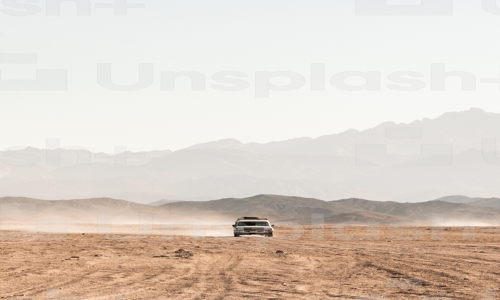

In [ ]:
from PIL import Image

img = Image.open('image_json.jpg')
img.resize((500, 300))

# 웹 스크래핑 실습 🔶 정형데이터

## ▶ 스크래핑 준비

- 접속 사이트 : https://search.naver.com/search.naver?where=m_view&sm=mtb_jum&query=


- 수집 대상 : 'python' 키워드 조회결과

- 수집건수 : 100건 (또는 가능한 많이)

- 저장 폴더 : /contents/csv

## ▶ 스크래핑 코드(prototype)

### 접속결과가 html 인 경우

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

url = f'https://m.search.naver.com/search.naver?where=m_view&sm=mtb_jum&query=python'
html = requests.get(url)
soup = BeautifulSoup(html.content, 'html.parser')

total = soup.select('.api_txt_lines.total_tit')

searchList = []
for i in total:
    temp = []
    temp.append(i.text)
    temp.append(i.attrs['href'])
    searchList.append(temp)

searchList
f = open(f'search_python.csv', 'w', encoding='utf-8', newline='')
csvWriter = csv.writer(f)
for i in searchList:
    csvWriter.writerow(i)
f.close()

print('완료되었습니다.')

완료되었습니다.


In [ ]:
# 저장된 파일 존재여부 확인
import glob

glob.glob('./**')

['./image_new.jpg',
 './image_json.jpg',
 './search_python.csv',
 './image_js.jpg',
 './sample_data']

In [ ]:
# 저장된 파일 내용 확인
import pandas as pd

pd.read_csv('search_python.csv')

### 접속결과가 json 인 경우

In [11]:
import json
import requests

url = f'http://www.krei.re.kr:18181/chart/main_chart/index/kind/W/sdate/2020-01-01/edate/2020-03-30'
html = requests.get(url)
html.content
# html.json()

b'[{"id":"42604","date":"20200102","symbol":null,"open":"205.58","close":"205.85","high":"208.52","low":"205.12","settlement":"205.85","volume":"81215"},{"id":"42608","date":"20200103","symbol":null,"open":"206.04","close":"204.66","high":"206.5","low":"202.73","settlement":"203.74","volume":"88965"},{"id":"42612","date":"20200106","symbol":null,"open":"203.01","close":"202.27","high":"204.02","low":"200.89","settlement":"202.09","volume":"79947"},{"id":"42616","date":"20200107","symbol":null,"open":"201.9","close":"202.27","high":"202.45","low":"200.43","settlement":"202.18","volume":"68670"},{"id":"42621","date":"20200108","symbol":null,"open":"201.9","close":"202.64","high":"204.2","low":"200.34","settlement":"203.1","volume":"88089"},{"id":"42625","date":"20200109","symbol":null,"open":"203.46","close":"207.05","high":"207.23","low":"203.1","settlement":"206.59","volume":"117166"},{"id":"42629","date":"20200110","symbol":null,"open":"206.77","close":"207.23","high":"208.88","low":"

In [2]:
json_obj = json.loads(html.content)
json_obj

[{'id': '42604',
  'date': '20200102',
  'symbol': None,
  'open': '205.58',
  'close': '205.85',
  'high': '208.52',
  'low': '205.12',
  'settlement': '205.85',
  'volume': '81215'},
 {'id': '42608',
  'date': '20200103',
  'symbol': None,
  'open': '206.04',
  'close': '204.66',
  'high': '206.5',
  'low': '202.73',
  'settlement': '203.74',
  'volume': '88965'},
 {'id': '42612',
  'date': '20200106',
  'symbol': None,
  'open': '203.01',
  'close': '202.27',
  'high': '204.02',
  'low': '200.89',
  'settlement': '202.09',
  'volume': '79947'},
 {'id': '42616',
  'date': '20200107',
  'symbol': None,
  'open': '201.9',
  'close': '202.27',
  'high': '202.45',
  'low': '200.43',
  'settlement': '202.18',
  'volume': '68670'},
 {'id': '42621',
  'date': '20200108',
  'symbol': None,
  'open': '201.9',
  'close': '202.64',
  'high': '204.2',
  'low': '200.34',
  'settlement': '203.1',
  'volume': '88089'},
 {'id': '42625',
  'date': '20200109',
  'symbol': None,
  'open': '203.46',
  '

In [3]:
json_obj[0]

{'id': '42604',
 'date': '20200102',
 'symbol': None,
 'open': '205.58',
 'close': '205.85',
 'high': '208.52',
 'low': '205.12',
 'settlement': '205.85',
 'volume': '81215'}

In [4]:
json_obj[1:3]

[{'id': '42608',
  'date': '20200103',
  'symbol': None,
  'open': '206.04',
  'close': '204.66',
  'high': '206.5',
  'low': '202.73',
  'settlement': '203.74',
  'volume': '88965'},
 {'id': '42612',
  'date': '20200106',
  'symbol': None,
  'open': '203.01',
  'close': '202.27',
  'high': '204.02',
  'low': '200.89',
  'settlement': '202.09',
  'volume': '79947'}]

In [5]:
print(type(json_obj))

<class 'list'>


In [6]:
print(type(json_obj[0]))

<class 'dict'>


In [8]:
pd.DataFrame(json_obj)

,id,date,symbol,open,close,high,low,settlement,volume
0,42604,20200102,None,205.58,205.85,208.52,205.12,205.85,81215
1,42608,20200103,None,206.04,204.66,206.5,202.73,203.74,88965
2,42612,20200106,None,203.01,202.27,204.02,200.89,202.09,79947
3,42616,20200107,None,201.9,202.27,202.45,200.43,202.18,68670
4,42621,20200108,None,201.9,202.64,204.2,200.34,203.1,88089
...,...,...,...,...,...,...,...,...,...
56,42831,20200324,None,205.95,205.76,206.68,202,206.31,133654
57,42835,20200325,None,205.76,213.02,214.3,204.57,213.11,219173
58,42839,20200326,None,212.93,209.07,214.21,207.41,209.07,163529
59,42844,20200327,None,209.25,210.45,215.68,207.05,209.89,182414


In [24]:
# 2023.4.23 수정
pd.read_json(html.content.decode())

,id,date,symbol,open,close,high,low,settlement,volume
0,42604,20200102,NaN,205.58,205.85,208.52,205.12,205.85,81215
1,42608,20200103,NaN,206.04,204.66,206.50,202.73,203.74,88965
2,42612,20200106,NaN,203.01,202.27,204.02,200.89,202.09,79947
3,42616,20200107,NaN,201.90,202.27,202.45,200.43,202.18,68670
4,42621,20200108,NaN,201.90,202.64,204.20,200.34,203.10,88089
...,...,...,...,...,...,...,...,...,...
56,42831,20200324,NaN,205.95,205.76,206.68,202.00,206.31,133654
57,42835,20200325,NaN,205.76,213.02,214.30,204.57,213.11,219173
58,42839,20200326,NaN,212.93,209.07,214.21,207.41,209.07,163529
59,42844,20200327,NaN,209.25,210.45,215.68,207.05,209.89,182414


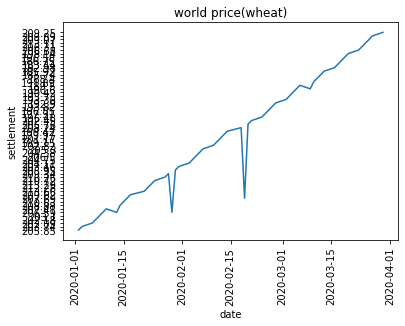

In [ ]:
# 잘못된 plot
# 이런 현상이 일어나는 이유는 ?
import matplotlib.pyplot as plt

df = pd.DataFrame(json_obj)

plt.plot(pd.to_datetime(df['date'], format='%Y%m%d'), df['settlement'])
plt.title('world price(wheat)')
plt.xlabel("date")
plt.ylabel("settlement")
plt.xticks(rotation='vertical')
plt.show()

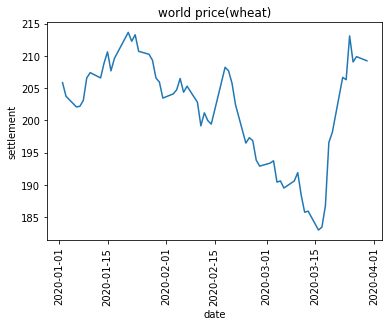

In [ ]:
# 올바른 plot
import matplotlib.pyplot as plt

df = pd.DataFrame(json_obj)
df['settlement'] = df['settlement'].astype(float)

plt.plot(pd.to_datetime(df['date'],format='%Y%m%d'), df['settlement'])
plt.title('world price(wheat)')
plt.xlabel("date")
plt.ylabel("settlement")
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# 수신 결과를 간편하게 json()함수를 이용하여 dict 자료형 생성 후 데이터프레임으로 변환
import json
import requests

url = f'https://www.dabangapp.com/api/3/room/list/multi-room/bbox?api_version=3.0.1&call_type=web&filters=%7B%22multi_room_type%22%3A%5B0%2C1%2C2%5D%2C%22selling_type%22%3A%5B0%2C1%2C2%5D%2C%22deposit_range%22%3A%5B0%2C999999%5D%2C%22price_range%22%3A%5B0%2C999999%5D%2C%22trade_range%22%3A%5B0%2C999999%5D%2C%22maintenance_cost_range%22%3A%5B0%2C999999%5D%2C%22include_maintenance_option1%22%3Atrue%2C%22room_size%22%3A%5B0%2C999999%5D%2C%22supply_space_range%22%3A%5B0%2C999999%5D%2C%22room_floor_multi%22%3A%5B1%2C2%2C3%2C4%2C5%2C6%2C7%2C-1%2C0%5D%2C%22division%22%3Afalse%2C%22duplex%22%3Afalse%2C%22room_type%22%3A%5B1%2C2%5D%2C%22enter_date_range%22%3A%5B0%2C999999%5D%2C%22parking_average_range%22%3A%5B0%2C999999%5D%2C%22household_num_range%22%3A%5B0%2C999999%5D%2C%22parking%22%3Afalse%2C%22animal%22%3Afalse%2C%22short_lease%22%3Afalse%2C%22full_option%22%3Afalse%2C%22built_in%22%3Afalse%2C%22elevator%22%3Afalse%2C%22balcony%22%3Afalse%2C%22loan%22%3Afalse%2C%22safety%22%3Afalse%2C%22pano%22%3Afalse%2C%22deal_type%22%3A%5B0%2C1%5D%7D&location=%5B%5B126.72381706093961%2C37.62761714418107%5D%2C%5B126.82116752313505%2C37.69563064198876%5D%5D&page=1&zoom=1'
html = requests.get(url)
html.content


In [ ]:
data = html.json()
data

In [ ]:
pd.DataFrame(data['rooms'])

,is_sign_verified,is_favorited,seq,id,user_id,status,deleted,name,title,room_type,...,is_quick,messenger_seq,messenger_answer_date_str,is_messenger_actived,is_extend_ui,is_new_construction,is_direct,is_receive_serve,is_contract,messenger_fake_reward_status
0,False,None,34462059,63eda086d980aa4764404a5c,mjoo61@naver.com,1,False,성민주,동문굿모닝힐 2차 복층형,0,...,False,None,None,False,True,False,False,False,False,None
1,False,None,34424697,63eba0055814393e55d8f3c3,rangpu1004@hanmail.net,1,False,이영숙,세안고 24년 1월만기 복층,0,...,False,None,None,False,True,False,False,False,False,None
2,False,None,34461734,63ed9e22582f1851d1653d77,rangpu1004@hanmail.net,1,False,이영숙,공실하시입주 방2 화2 남서향 밝은집 단층,3,...,False,None,None,False,True,False,False,False,False,None
3,False,None,34362323,63e98b9f947f8954dee8aa4d,adam1450hs@naver.com,1,False,김관옥,"서북향복층,3월초순,중순,미리연락요.",3,...,True,None,None,False,True,False,False,False,False,None
4,False,None,34489499,63eeea56f7aa2d3feca253db,hyunye0721@naver.com,1,False,메리트공인중개사사무소,넖은방. 전입. 즉시,3,...,True,None,None,False,True,False,False,False,False,None
5,False,None,34304682,63e4bae17c25fb4a72289094,gotisttot@naver.com,1,False,장일곤,전원주택풍의 특올수리 독채입니다.,2,...,True,None,None,False,True,False,False,False,False,None
6,False,None,33857088,63cb66223f319104c72df747,hodongpz@hanmail.net,1,False,박동호,백석역세권 깔끔한 투룸 입주청소 완료된 집,1,...,True,None,None,False,True,False,False,False,False,None
7,False,None,34455436,63ed8aaa5b70460c4efc4765,sigoul1@naver.com,1,False,이상우,첫입주.신혼부부강력추천.융자무.안전한전세,3,...,True,None,None,False,True,False,False,False,False,None
8,False,None,34351565,63e73ff0eb1552389b7686c0,star9192@naver.com,1,False,이현승,"바로입주가능,편의시설인접,깨끗함,대화역버스5분",1,...,True,None,None,False,True,False,False,False,False,None
9,False,None,34273720,63e368549427bc5af8b661f9,wjdgusdud703@naver.com,1,False,신호재,풍동 신혼부부에게 딱 좋은 집,2,...,True,None,None,False,True,False,False,False,False,None


# ❓생각해 볼 문제

 ## 웹 스크래핑의 문제점

- 보안 : 인증처리가 필요한 스크래핑의 경우 비밀번호가 저장됨(타인)
- 개인정보 침해 : 스크래핑 프로그램이 요구되는 정보 이외를 수집
- 변경 대응력 : 기본적으로 HTML의 경우 DOM 기반이기 때문에 수정에 따른 유지보수 비용 발생
- 웹 제약 : 모바일로 서비스되는 앱에 노출되는 데이터는 접근 불가
- 통제와 고위험 : 프로그램이 통제되지 않는 경우 필요 이상의 서버 부하 발생
- 사례를 통해 보는 웹 스크래핑 이슈 (그때는 틀리고, 지금은 맞다 ?)
  - [2020]여기○○, ○놀자 DB 무단수집 위법 (https://www.etnews.com/20200211000365)
  - [2022]여기○○, ○놀자 정보 무단복제 혐의 무죄 확정.."일반에 공개된 정보"] (https://www.ajunews.com/view/20220512104443763)

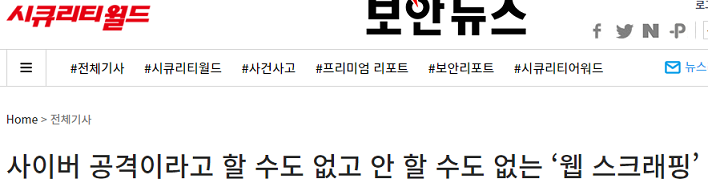

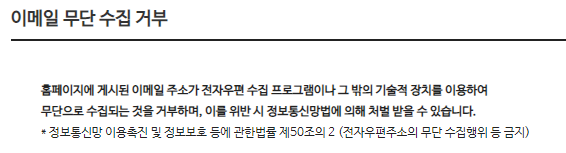

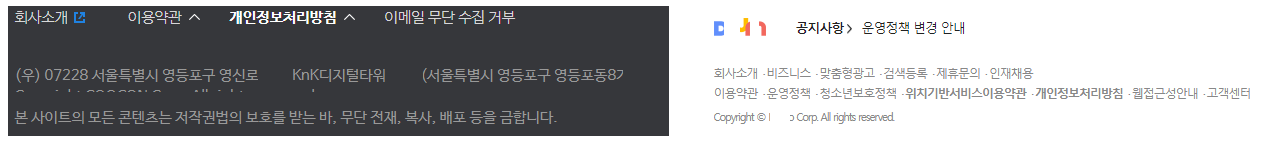

 ## 대응 방안과 지향점

- 데이터 보유 기관 또는 업체에서 제공하는 정식 API 서비스 이용
- 고도의 윤리적, 도덕적 책임의식 필요